# EDA, Preprocessing, and Binary Classification

Tune
- shuffle twitter data
- 限制 TF-IDF max_feature

In [1]:
# Data Analysis
import re
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
sns.set_theme()

# Dimension reduction
from sklearn.decomposition import TruncatedSVD

# Model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Text Processing 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Other
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report

# NLTK resource
import nltk
# nltk.download('punkt')  # for word_tokenize
# nltk.download('wordnet')  # for WordNetLemmatizer
# nltk.download('omw-1.4')
# nltk.download('stopwords')

## 1: EDA

In [2]:
data = pd.read_csv('../data/kaggle+twitter.csv', index_col=[0]).dropna().reset_index(drop=True)
data.shape

(8775, 2)

In [4]:
data.tail()

,type,flat
8770,ISFP,fight ensur power medium corpor planet treat f...
8771,ISFP,face_with_tears_of_joy sign_of_the_horns_mediu...
8772,INTJ,cst___ video light venu everyth power realli a...
8773,INFJ,support affect elementari school shoot uvald t...
8774,ENFP,hear someon open bag chip year marriag handsom...


由於 Twitter 的資料在最後面，我把他打亂並重設 index

In [88]:
data_shuffle = data.sample(frac=1, random_state=42).reset_index(drop=True)
data_shuffle

,type,flat
0,INFJ,phobic weari men feminist misogynist take pers...
1,INTJ,say necessarili know one harm sex problem bit ...
2,INFP,usual claim good decis decid order go day frie...
3,ENFJ,yeah friend relationship work togeth never met...
4,ENTP,sound like typic trait role se h fe lack ethic...
...,...,...
8770,INFJ,correct went troubl becom dish end irrespect d...
8771,ENFP,trick know valu know passion find group peopl ...
8772,INFP,ok talk friend age lot late go pose question f...
8773,INFP,even loner get lone feel like hard hard relati...


## 4: Feature engineering

### TF-IDF

不設任何限制的 Tf-IDf 會有 78195 個 features

In [89]:
vectorizer = TfidfVectorizer(analyzer="word",
                          max_features=5000,
                          lowercase=None,
                          ngram_range=(1,1)).fit(data['flat'])
X_tfidf = vectorizer.transform(data_shuffle['flat'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names())
df_tfidf

,ab,abandon,abc,aben,abil,abl,abnorm,abort,abroad,absenc,...,yr,yummi,yup,zealand,zen,zero,zodiac,zombi,zone,zoom
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.025573,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.028191,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8770,0.0,0.0,0.0,0.0,0.000000,0.023264,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8771,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8773,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### TruncatedSVD
計算出 100 個奇異值最大的值

In [90]:
svd = TruncatedSVD(n_components=100, n_iter=10, random_state=42).fit(X_tfidf)
X_svd = svd.transform(X_tfidf)
X_svd.shape

(8775, 100)

In [91]:
print(svd.explained_variance_ratio_)

[0.00953746 0.01257219 0.00734972 0.00619884 0.00609662 0.00585023
 0.00495618 0.00435337 0.00406621 0.00391197 0.00346088 0.00326971
 0.00295494 0.00288657 0.00269171 0.00265128 0.00255089 0.00252989
 0.00248492 0.00236652 0.00227749 0.00216955 0.00215067 0.00193896
 0.00188727 0.00187454 0.00183126 0.00176162 0.00174188 0.0017197
 0.00168961 0.00165227 0.00161279 0.00155444 0.00153153 0.0015281
 0.00150315 0.00147112 0.00143935 0.00142007 0.00139731 0.00137743
 0.00136227 0.00135242 0.0013493  0.00132974 0.00131053 0.00130459
 0.00128908 0.00128549 0.00126371 0.00125038 0.00124483 0.00124098
 0.00122297 0.0012109  0.00120003 0.00119035 0.00118535 0.0011801
 0.00116824 0.00115346 0.00114995 0.00114383 0.00113247 0.0011243
 0.00111832 0.00111669 0.00110493 0.00109926 0.00109349 0.00108897
 0.00107931 0.00106611 0.00106527 0.00106279 0.0010514  0.0010475
 0.00103997 0.00103635 0.00102811 0.0010191  0.00101727 0.00101432
 0.00100878 0.00099808 0.00099149 0.00098638 0.00097774 0.00097664


In [92]:
svd.explained_variance_ratio_.sum()

0.19447312018749988

In [93]:
df_svd = pd.DataFrame(X_svd)
df_svd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.363486,0.092361,0.020915,0.000905,0.058869,-0.030309,-0.064319,0.050199,0.074329,-0.056359,...,-0.014834,0.013021,-0.025605,0.025398,-0.032181,0.011540,-0.066797,-0.006712,-0.017185,0.045102
1,0.442201,0.039657,-0.052569,0.043425,-0.054642,0.007220,0.019518,-0.003803,0.000792,-0.007437,...,0.004290,-0.008705,-0.033144,0.054178,0.020487,-0.050765,0.039164,0.027918,0.019965,0.015421
2,0.439361,-0.030069,-0.008155,-0.055520,-0.000690,0.017058,0.030178,0.005012,-0.049394,-0.042049,...,-0.010060,-0.007661,0.046790,0.036075,-0.012123,0.035859,0.023038,0.004055,0.019103,-0.037175
3,0.546530,-0.102718,0.029561,-0.110666,0.069162,0.024905,0.040038,-0.047384,0.045537,0.006016,...,0.024951,0.037375,-0.057594,-0.009628,0.040488,-0.021829,-0.026602,0.004993,-0.035821,-0.011988
4,0.339090,0.089742,0.007957,-0.002794,-0.005191,-0.014061,0.054330,0.006011,0.009995,-0.059195,...,-0.002710,0.007937,-0.021940,0.041429,-0.009200,0.047289,0.011754,0.012231,-0.038381,0.006932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8770,0.407113,-0.025579,0.046408,0.003619,-0.079725,0.015925,0.018874,-0.015691,0.019814,-0.017399,...,0.005422,-0.008652,-0.014238,-0.032663,-0.032993,-0.029994,0.012374,-0.014560,-0.013224,0.010916
8771,0.462864,-0.017615,-0.043873,0.021776,-0.050622,-0.011601,0.107675,0.013228,-0.051938,-0.068162,...,0.027888,0.018928,-0.056053,-0.005841,0.019112,0.052653,-0.003148,0.004743,-0.024051,0.043724
8772,0.536835,-0.115724,-0.019006,-0.078610,-0.030310,0.062629,-0.013993,-0.037991,-0.001099,0.027021,...,-0.022899,0.006729,-0.014681,-0.025389,0.003504,-0.030597,-0.009260,-0.046303,0.024246,0.013692
8773,0.532045,-0.088887,0.022660,-0.022247,-0.051876,0.038478,-0.049679,-0.011053,-0.036347,-0.052130,...,-0.000398,0.029893,-0.005060,-0.008253,-0.014648,0.032788,0.022893,0.053205,0.023303,0.002255


## Binary Classification

In [102]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0

    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data_labeled = data_shuffle.join(data_shuffle.apply (lambda row: get_types (row),axis=1))
data_labeled

,type,flat,IE,NS,TF,JP
0,INFJ,phobic weari men feminist misogynist take pers...,1,1,0,1
1,INTJ,say necessarili know one harm sex problem bit ...,1,1,1,1
2,INFP,usual claim good decis decid order go day frie...,1,1,0,0
3,ENFJ,yeah friend relationship work togeth never met...,0,1,0,1
4,ENTP,sound like typic trait role se h fe lack ethic...,0,1,1,0
...,...,...,...,...,...,...
8770,INFJ,correct went troubl becom dish end irrespect d...,1,1,0,1
8771,ENFP,trick know valu know passion find group peopl ...,0,1,0,0
8772,INFP,ok talk friend age lot late go pose question f...,1,1,0,0
8773,INFP,even loner get lone feel like hard hard relati...,1,1,0,0


In [103]:
# Store data with labeled to csv
data_labeled.to_csv('../data/Kaggle_MBTI_twitter_labeled_shuffle.csv', index=False)

In [243]:
# # Load labeled data
# data_labeled = pd.read_csv('../data/Kaggle_MBTI_twitter_labeled_shuffle.csv')

#### Training and Testing Split

Only executive one time.

In [104]:
# Train test split
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_svd, data_labeled['IE'], test_size=0.2, random_state=42, stratify=data_labeled['IE'])
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_svd, data_labeled['NS'], test_size=0.2, random_state=42, stratify=data_labeled['NS'])
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_svd, data_labeled['TF'], test_size=0.2, random_state=42, stratify=data_labeled['TF'])
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_svd, data_labeled['JP'], test_size=0.2, random_state=42, stratify=data_labeled['JP'])

In [105]:
IE_dataset = {"X_train": X_train_IE, "X_test": X_test_IE, "Y_train": Y_train_IE, "Y_test": Y_test_IE}
NS_dataset = {"X_train": X_train_NS, "X_test": X_test_NS, "Y_train": Y_train_NS, "Y_test": Y_test_NS}
TF_dataset = {"X_train": X_train_TF, "X_test": X_test_TF, "Y_train": Y_train_TF, "Y_test": Y_test_TF}
JP_dataset = {"X_train": X_train_JP, "X_test": X_test_JP, "Y_train": Y_train_JP, "Y_test": Y_test_JP}

In [69]:
# # Store binary dataset to pickle
# import pickle
# dataset = {'IE':IE_dataset,'NS':NS_dataset,'TF':TF_dataset,'JP':JP_dataset}

# for idx, (k,v) in enumerate(dataset.items()):
#     path = '../data/ka_tw_'+str(k)+'.pickle'
#     with open(path, 'wb') as file:
#         pickle.dump(v, file)

In [248]:
# # Load dataset form pickle
# data_IE = pd.read_pickle('../data/ka_tw_IE.pickle')
# data_NS = pd.read_pickle('../data/ka_tw_NS.pickle')
# data_TF = pd.read_pickle('../data/ka_tw_TF.pickle')
# data_JP = pd.read_pickle('../data/ka_tw_JP.pickle')

# X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = data_IE['X_train'], data_IE['X_test'], data_IE['Y_train'], data_IE['Y_test']
# X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = data_NS['X_train'], data_NS['X_test'], data_NS['Y_train'], data_NS['Y_test']
# X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = data_TF['X_train'], data_TF['X_test'], data_TF['Y_train'], data_TF['Y_test']
# X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = data_JP['X_train'], data_JP['X_test'], data_JP['Y_train'], data_JP['Y_test']

In [106]:
print(f'Each dataset:\nTrain|| X:{X_train_IE.shape}\tY:{Y_train_IE.shape} \nTest || X:{X_test_IE.shape}\tY:{Y_test_IE.shape}\n')

Each dataset:
Train|| X:(7020, 100)	Y:(7020,) 
Test || X:(1755, 100)	Y:(1755,)



#### Model method

In [81]:
def fitCV(model):
    '''
    Input: Base model
    Output: Models for each dimension
    '''
    # Cross validation
    grid1 = GridSearchCV(model,{},cv=10)
    grid2 = GridSearchCV(model,{},cv=10)
    grid3 = GridSearchCV(model,{},cv=10)
    grid4 = GridSearchCV(model,{},cv=10)
    # Fit
    model_IE = grid1.fit(X_train_IE,Y_train_IE)
    model_NS = grid2.fit(X_train_NS,Y_train_NS)
    model_TF = grid3.fit(X_train_TF,Y_train_TF)
    model_JP = grid4.fit(X_train_JP,Y_train_JP)

    return model_IE,model_NS,model_TF,model_JP

In [19]:
def predictCV(model_IE,model_NS,model_TF,model_JP):
    '''
    Input: 4 models
    Output: Predict on test data for each dimension
    '''
    ypredIE = model_IE.best_estimator_.predict(X_test_IE)
    ypredNS = model_NS.best_estimator_.predict(X_test_NS)
    ypredTF = model_TF.best_estimator_.predict(X_test_TF)
    ypredJP = model_JP.best_estimator_.predict(X_test_JP)
    return ypredIE, ypredNS, ypredTF, ypredJP

#### Evaluation method

In [20]:
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):
   '''
   Function to print Classification Report of the given model
   This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models).
   '''
   print(f'Classification Report for Introversion(I) / Extroversion(E):\n {classification_report(Y_test_IE, ypredIE)}\n')
   print(f'Classification Report for Intuition(N) / Sensing(S):\n {classification_report(Y_test_NS, ypredNS)}\n')
   print(f'Classification Report for Thinking(T) / Feeling(F):\n{classification_report(Y_test_TF, ypredTF)}\n')
   print(f'Classification Report for Judging(J) / Perceiving(P):\n {classification_report(Y_test_JP, ypredJP)}\n')


def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):
   cm = confusion_matrix(Y_test_IE, ypredIE)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Reds_r',fmt='g')
   plt.ylabel('Y_test_IE')
   plt.xlabel('ypredIE')
   plt.title('Confusion matrix for Introversion(I) / Extroversion(E): ', size=12)

   cm = confusion_matrix(Y_test_NS, ypredNS)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Greens_r',fmt='g')
   plt.ylabel('Y_test_NS')
   plt.xlabel('ypredNS')
   plt.title('Confusion matrix for Intuition(N) / Sensing(S): ', size=12)

   cm = confusion_matrix(Y_test_TF, ypredTF)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Blues_r',fmt='g')
   plt.ylabel('Y_test_TF')
   plt.xlabel('ypredTF')
   plt.title('Confusion matrix for Thinking(T) / Feeling(F): ', size=12)

   cm = confusion_matrix(Y_test_JP, ypredJP)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Purples_r',fmt='g')
   plt.ylabel('Y_test_JP')
   plt.xlabel('ypredJP')
   plt.title('Confusion matrix for Judging(J) / Perceiving(P): ', size=12)


def print_roc_auc_curve(probIE, probNS, probTF, probJP, title:str):
   fp_IE, tp_IE, _ = roc_curve(Y_test_IE, probIE[:,1])
   fp_NS, tp_NS, _ = roc_curve(Y_test_NS, probNS[:,1])
   fp_TF, tp_TF, _ = roc_curve(Y_test_TF, probTF[:,1])
   fp_JP, tp_JP, _ = roc_curve(Y_test_JP, probJP[:,1])
   plt.figure(figsize=(8,5))
   plt.plot(fp_IE, tp_IE, linestyle=':', color='indianred', label=f'Introversion(I) / Extroversion(E) (area={auc(fp_IE, tp_IE):.2f})',linewidth=1.8)
   plt.plot(fp_NS, tp_NS, linestyle='--', color='darkseagreen', label=f'Intuition(N) / Sensing(S) (area={auc(fp_NS, tp_NS):.2f})',linewidth=1.8)
   plt.plot(fp_TF, tp_TF, linestyle='-.', color='dodgerblue', label=f'Thinking(T) / Feeling(F) (area={auc(fp_TF, tp_TF):.2f})',linewidth=1.8)
   plt.plot(fp_JP, tp_JP, linestyle='--', color='orchid', label=f'Judging(J) / Perceiving(P) (area={auc(fp_TF, tp_TF):.2f})',linewidth=1.8)
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title+' ROC Curve')
   plt.legend(loc='best')
   plt.savefig('../img/ROC_tw_'+title+'.png')

### Training

#### Naive Bayes Model

In [107]:
gNB = GaussianNB()
# Fit
gNB_IE, gNB_NS, gNB_TF, gNB_JP = fitCV(gNB)
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predictCV(gNB_IE,gNB_NS,gNB_TF,gNB_JP)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.43      0.26      0.33       411
           1       0.80      0.90      0.84      1344

    accuracy                           0.75      1755
   macro avg       0.62      0.58      0.59      1755
weighted avg       0.71      0.75      0.72      1755


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.26      0.19      0.22       254
           1       0.87      0.91      0.89      1501

    accuracy                           0.80      1755
   macro avg       0.56      0.55      0.55      1755
weighted avg       0.78      0.80      0.79      1755


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       951
           1       0.63      0.75      0.68       804

    accuracy

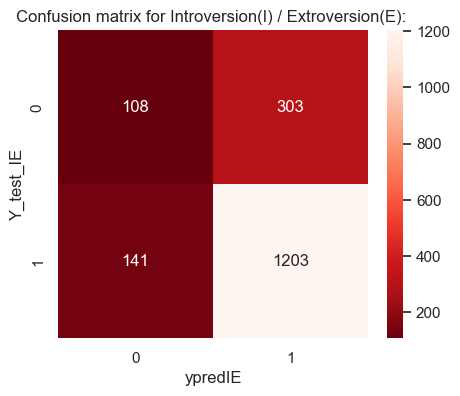

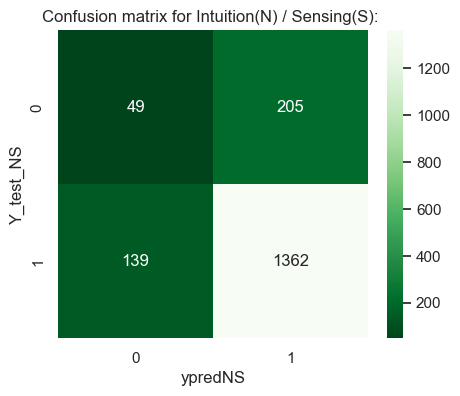

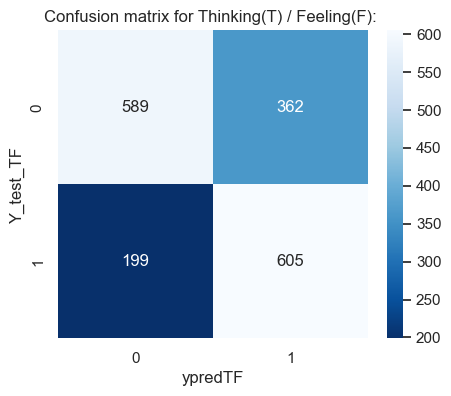

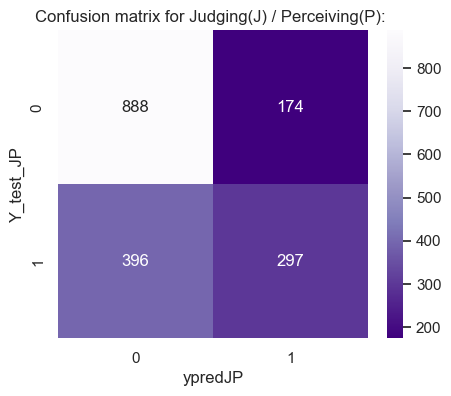

In [108]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

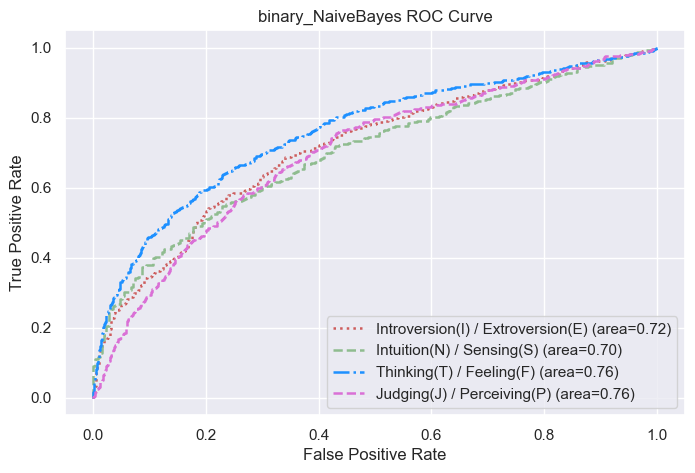

In [109]:
# ROC curve
print_roc_auc_curve(gNB_IE.best_estimator_.predict_proba(X_test_IE),
                    gNB_NS.best_estimator_.predict_proba(X_test_NS),
                    gNB_TF.best_estimator_.predict_proba(X_test_TF),
                    gNB_JP.best_estimator_.predict_proba(X_test_JP),
                    title='binary_NaiveBayes')

#### Logistic Regression

In [110]:
log = LogisticRegression(random_state=42,max_iter=500)
# Fit
log_IE, log_NS, log_TF, log_JP = fitCV(log)
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predictCV(log_IE,log_NS,log_TF,log_JP)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.64      0.13      0.21       411
           1       0.79      0.98      0.87      1344

    accuracy                           0.78      1755
   macro avg       0.71      0.55      0.54      1755
weighted avg       0.75      0.78      0.72      1755


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.73      0.03      0.06       254
           1       0.86      1.00      0.92      1501

    accuracy                           0.86      1755
   macro avg       0.79      0.51      0.49      1755
weighted avg       0.84      0.86      0.80      1755


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       951
           1       0.77      0.74      0.76       804

    accuracy

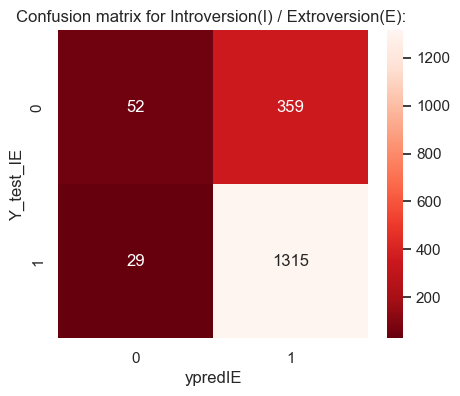

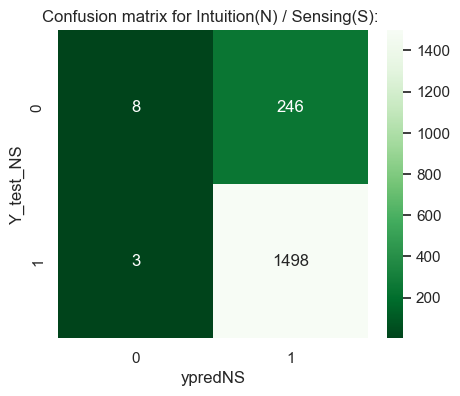

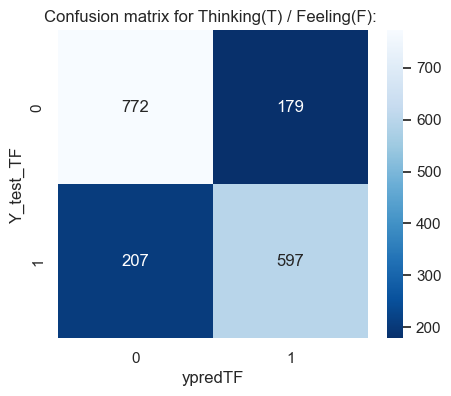

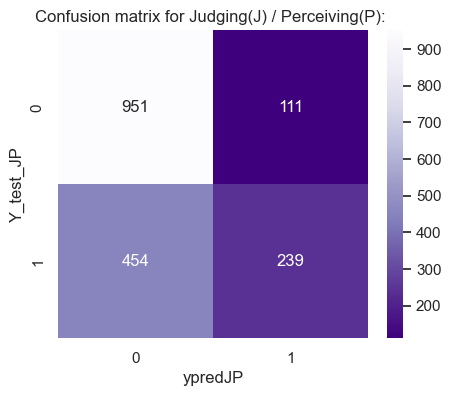

In [111]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

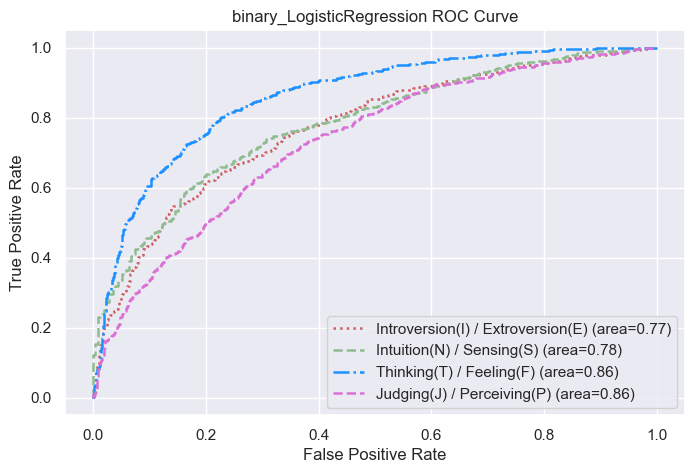

In [112]:
# ROC curve
print_roc_auc_curve(log_IE.best_estimator_.predict_proba(X_test_IE),
                    log_NS.best_estimator_.predict_proba(X_test_NS),
                    log_TF.best_estimator_.predict_proba(X_test_TF),
                    log_JP.best_estimator_.predict_proba(X_test_JP),
                    title='binary_LogisticRegression')

#### SVM

In [113]:
svm = SVC(random_state=42, probability=True)
# Fit
svm_IE, svm_NS, svm_TF, svm_JP = fitCV(svm)
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predictCV(svm_IE,svm_NS,svm_TF,svm_JP)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.50      0.03      0.06       411
           1       0.77      0.99      0.87      1344

    accuracy                           0.77      1755
   macro avg       0.63      0.51      0.46      1755
weighted avg       0.71      0.77      0.68      1755


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.64      0.04      0.07       254
           1       0.86      1.00      0.92      1501

    accuracy                           0.86      1755
   macro avg       0.75      0.52      0.50      1755
weighted avg       0.83      0.86      0.80      1755


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       951
           1       0.77      0.74      0.75       804

    accuracy

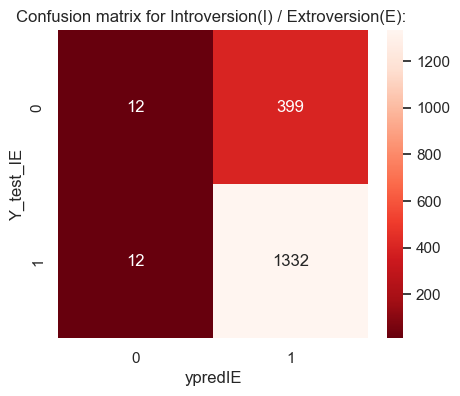

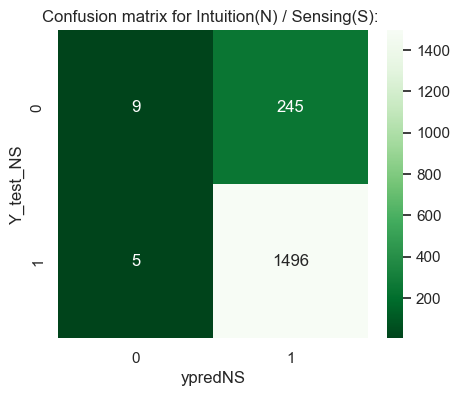

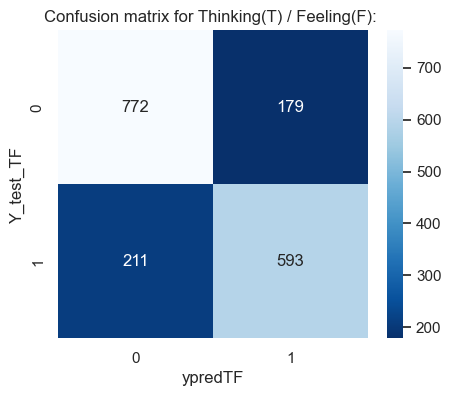

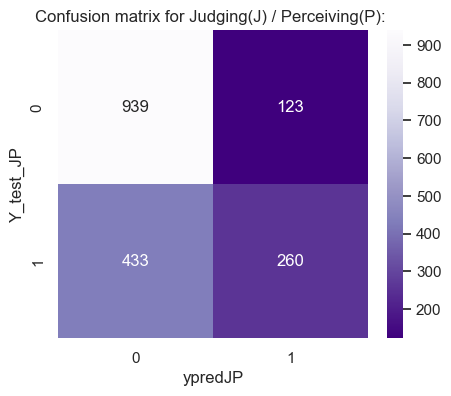

In [114]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

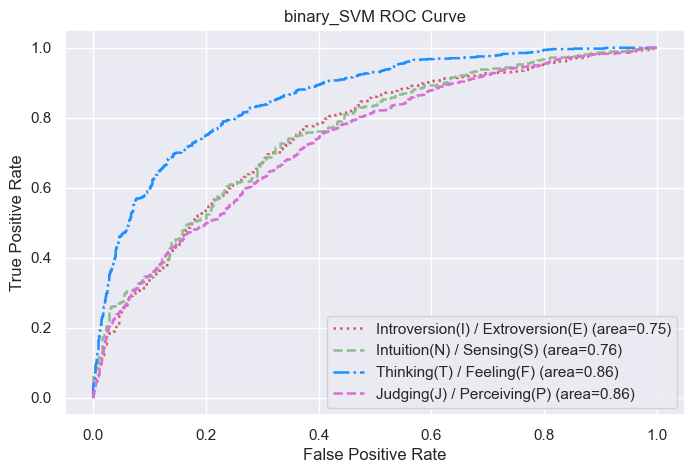

In [115]:
# ROC curve
print_roc_auc_curve(svm_IE.best_estimator_.predict_proba(X_test_IE),
                    svm_NS.best_estimator_.predict_proba(X_test_NS),
                    svm_TF.best_estimator_.predict_proba(X_test_TF),
                    svm_JP.best_estimator_.predict_proba(X_test_JP),
                    title='binary_SVM')

#### K-Nearest Neighbor (KNN)

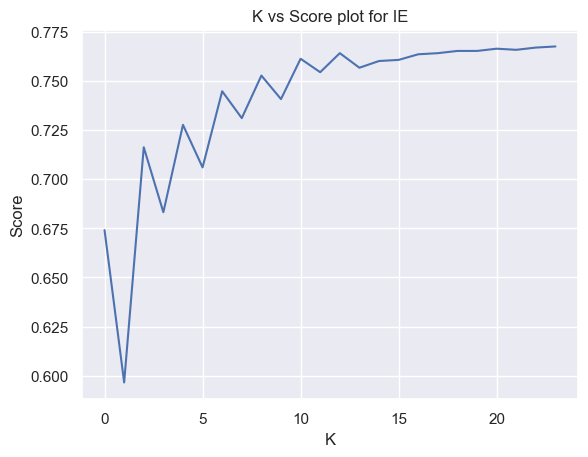

Maximum Accuracy of 0.7675213675213676 at k=24


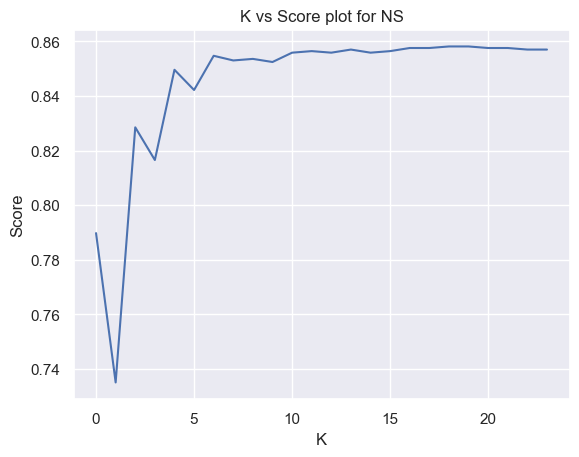

Maximum Accuracy of 0.8581196581196581 at k=19


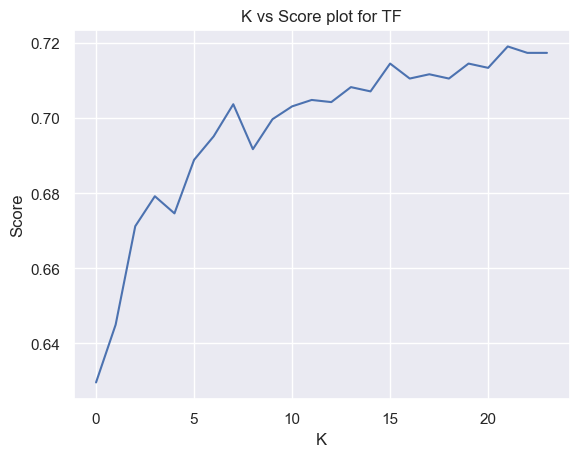

Maximum Accuracy of 0.719088319088319 at k=22


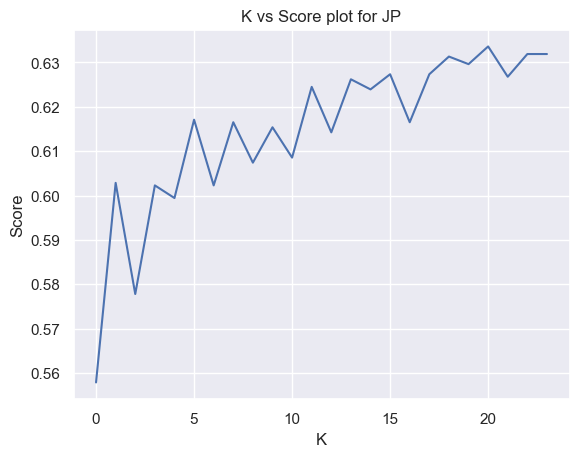

Maximum Accuracy of 0.719088319088319 at k=22


In [116]:
def plot_graph(val,xlab,ylab,title):
    plt.figure()
    plt.plot(val)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(title)
    plt.show()

# IE prediction
k1_score = []
for i in range(1,25):
    k1 = KNeighborsClassifier(n_neighbors=i)
    k1.fit(X_train_IE, Y_train_IE)
    k1_score.append(k1.score(X_test_IE, Y_test_IE))

df1 = pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'K','Score','K vs Score plot for IE')
print(f'Maximum Accuracy of {df1.max()[0]} at k={df1.idxmax()[0]+1}')

# NS prediction
k2_score = []
for i in range(1,25):
	k2 = KNeighborsClassifier(n_neighbors=i)
	k2.fit(X_train_NS, Y_train_NS)
	k2_score.append(k2.score(X_test_NS, Y_test_NS))

df2 = pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'K','Score','K vs Score plot for NS')
print(f'Maximum Accuracy of {df2.max()[0]} at k={df2.idxmax()[0]+1}')

# TF prediction
k3_score = []
for i in range(1,25):
  k3 = KNeighborsClassifier(n_neighbors=i)
  k3.fit(X_train_TF, Y_train_TF)
  k3_score.append(k3.score(X_test_TF, Y_test_TF))

df3 = pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'K','Score','K vs Score plot for TF')
print(f'Maximum Accuracy of {df3.max()[0]} at k={df3.idxmax()[0]+1}')

# JP prediction
k4_score=[]
for i in range(1,25):
  k4 = KNeighborsClassifier(n_neighbors=i)
  k4.fit(X_train_JP, Y_train_JP)
  k4_score.append(k4.score(X_test_JP, Y_test_JP))

df4 = pd.DataFrame(k3_score,columns=['JP'])
plot_graph(k4_score,'K','Score','K vs Score plot for JP')
print(f'Maximum Accuracy of {df4.max()[0]} at k={df4.idxmax()[0]+1}')

In [117]:
kbestIE = KNeighborsClassifier(n_neighbors=df1.idxmax()[0]+1)
knn_IE = kbestIE.fit(X_train_IE,Y_train_IE)
ypredIE = knn_IE.predict(X_test_IE)

kbestNS = KNeighborsClassifier(n_neighbors=df2.idxmax()[0]+1)
knn_NS = kbestNS.fit(X_train_NS,Y_train_NS)
ypredNS = knn_NS.predict(X_test_NS)

kbestTF = KNeighborsClassifier(n_neighbors=df3.idxmax()[0]+1)
knn_TF = kbestTF.fit(X_train_TF,Y_train_TF)
ypredTF = knn_TF.predict(X_test_TF)

kbestJP = KNeighborsClassifier(n_neighbors=df4.idxmax()[0]+1)
knn_JP = kbestJP.fit(X_train_JP,Y_train_JP)
ypredJP = knn_JP.predict(X_test_JP)

# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.53      0.07      0.12       411
           1       0.77      0.98      0.87      1344

    accuracy                           0.77      1755
   macro avg       0.65      0.52      0.49      1755
weighted avg       0.72      0.77      0.69      1755


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.63      0.05      0.09       254
           1       0.86      1.00      0.92      1501

    accuracy                           0.86      1755
   macro avg       0.75      0.52      0.51      1755
weighted avg       0.83      0.86      0.80      1755


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       951
           1       0.68      0.73      0.70       804

    accuracy

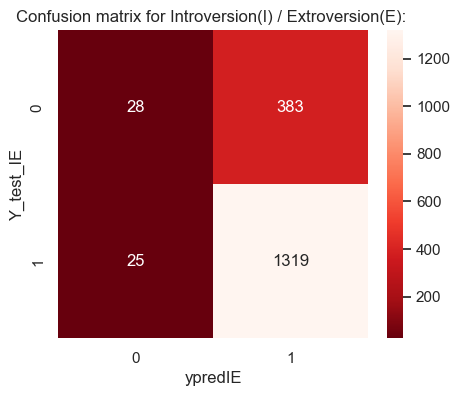

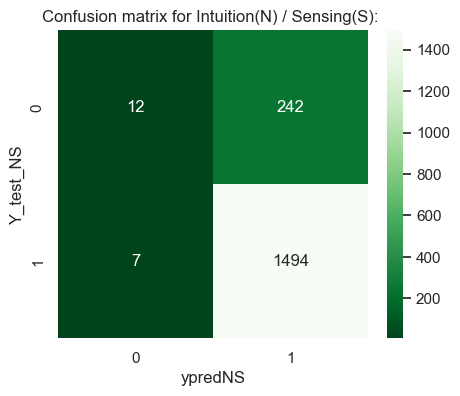

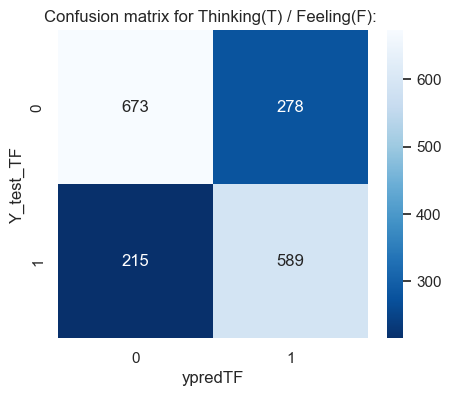

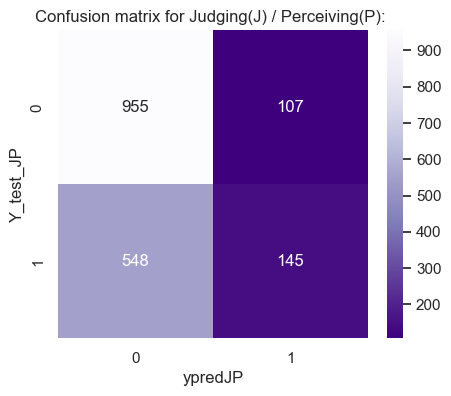

In [118]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

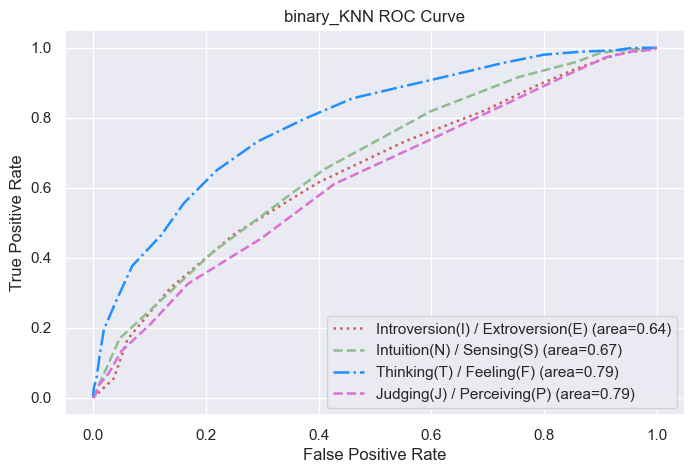

In [119]:
# ROC curve
print_roc_auc_curve(kbestIE.predict_proba(X_test_IE),
                    kbestNS.predict_proba(X_test_NS),
                    kbestTF.predict_proba(X_test_TF),
                    kbestJP.predict_proba(X_test_JP),
                    title='binary_KNN')

#### Decision Tree

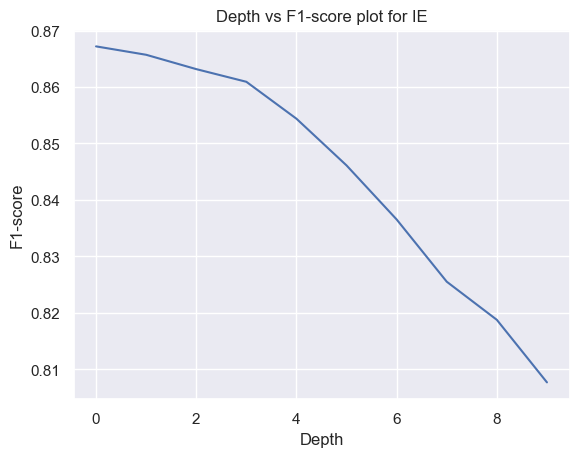

Maximum F1-score of 0.8671936264937905 at depth=1


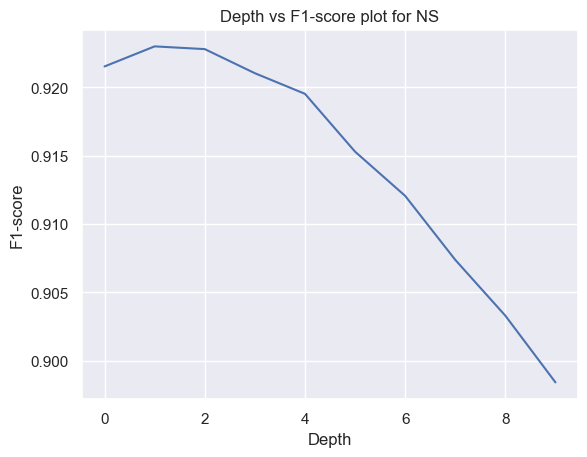

Maximum F1-score of 0.922993047602185 at depth=2


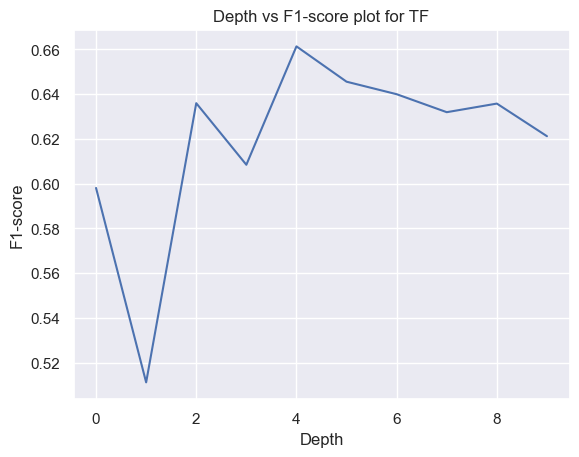

Maximum F1-score of 0.6613636836896719 at depth=5


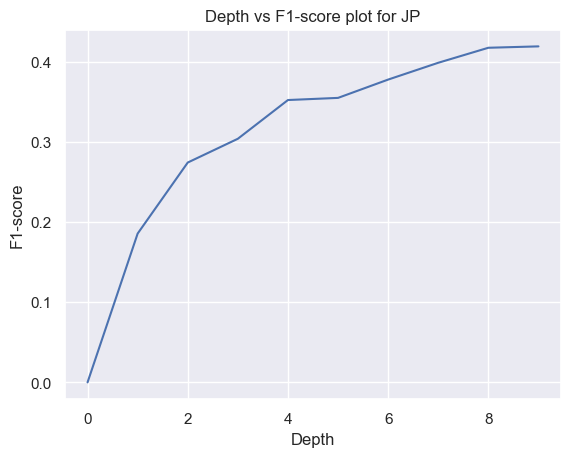

Maximum F1-score of 0.4188592134719723 at depth=10


In [120]:
def plot_graph(val, title):
    plt.plot(val)
    plt.ylabel('F1-score')
    plt.xlabel('Depth')
    plt.title(title)
    plt.show()

# IE prediction
k1_score = []
for i in range(1,11):
    k1_cart = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=42)
    score = cross_val_score(k1_cart, X_train_IE, Y_train_IE, cv=10, scoring='f1')
    k1_score.append(score.mean())
df1 = pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'Depth vs F1-score plot for IE')
print(f'Maximum F1-score of {df1.max()[0]} at depth={df1.idxmax()[0]+1}')

# NS prediction
k2_score = []
for i in range(1,11):
    k2_cart = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=42)
    score = cross_val_score(k2_cart, X_train_NS, Y_train_NS, cv=10, scoring='f1')
    k2_score.append(score.mean())
df2 = pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'Depth vs F1-score plot for NS')
print(f'Maximum F1-score of {df2.max()[0]} at depth={df2.idxmax()[0]+1}')

# TF prediction
k3_score = []
for i in range(1,11):
    k3_cart = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=42)
    score = cross_val_score(k3_cart, X_train_TF, Y_train_TF, cv=10, scoring='f1')
    k3_score.append(score.mean())
df3 = pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'Depth vs F1-score plot for TF')
print(f'Maximum F1-score of {df3.max()[0]} at depth={df3.idxmax()[0]+1}')

# JP prediction
k4_score=[]
for i in range(1,11):
    k4_cart = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=42)
    score = cross_val_score(k4_cart, X_train_JP, Y_train_JP, cv=10, scoring='f1')
    k4_score.append(score.mean())
df4 = pd.DataFrame(k4_score,columns=['JP'])
plot_graph(k4_score,'Depth vs F1-score plot for JP')
print(f'Maximum F1-score of {df4.max()[0]} at depth={df4.idxmax()[0]+1}')

In [121]:
dtbestIE = DecisionTreeClassifier(criterion="gini", max_depth=df1.idxmax()[0]+1, random_state=42)
dt_IE = dtbestIE.fit(X_train_IE,Y_train_IE)
ypredIE = dt_IE.predict(X_test_IE)

dtbestNS = DecisionTreeClassifier(criterion="gini", max_depth=df2.idxmax()[0]+1, random_state=42)
dt_NS = dtbestNS.fit(X_train_NS,Y_train_NS)
ypredNS = dt_NS.predict(X_test_NS)

dtbestTF = DecisionTreeClassifier(criterion="gini", max_depth=df3.idxmax()[0]+1, random_state=42)
dt_TF = dtbestTF.fit(X_train_TF,Y_train_TF)
ypredTF = dt_TF.predict(X_test_TF)

dtbestJP = DecisionTreeClassifier(criterion="gini", max_depth=df4.idxmax()[0]+1, random_state=42)
dt_JP = dtbestJP.fit(X_train_JP,Y_train_JP)
ypredJP = dt_JP.predict(X_test_JP)

# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       411
           1       0.77      1.00      0.87      1344

    accuracy                           0.77      1755
   macro avg       0.38      0.50      0.43      1755
weighted avg       0.59      0.77      0.66      1755


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.62      0.03      0.06       254
           1       0.86      1.00      0.92      1501

    accuracy                           0.86      1755
   macro avg       0.74      0.51      0.49      1755
weighted avg       0.82      0.86      0.80      1755


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       951
           1       0.64      0.66      0.65       804

    accuracy

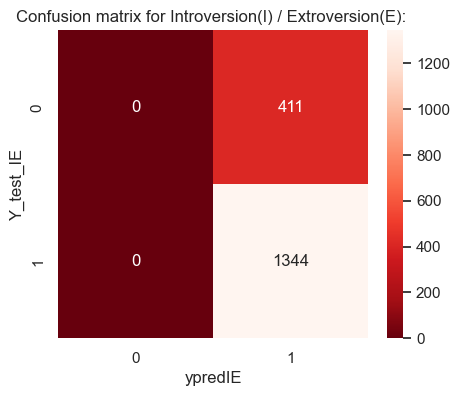

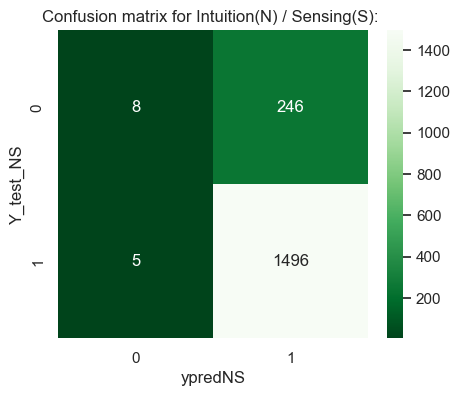

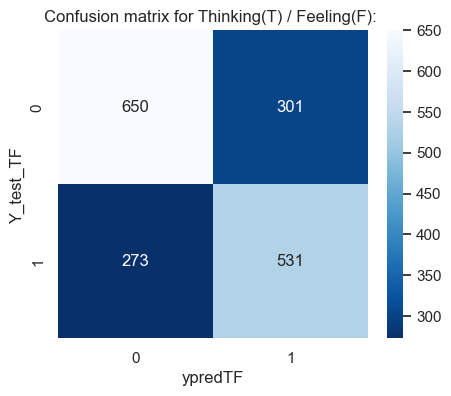

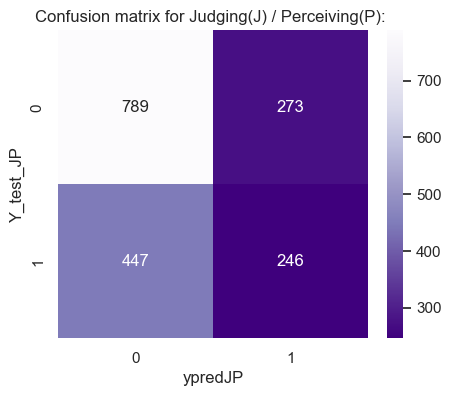

In [122]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

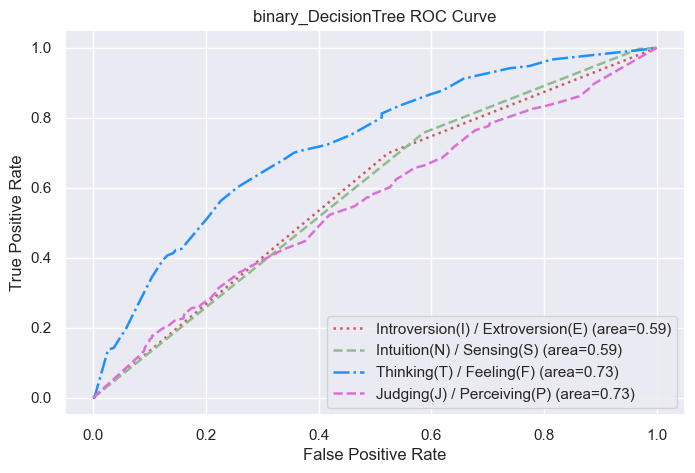

In [123]:
# ROC curve
print_roc_auc_curve(dtbestIE.predict_proba(X_test_IE),
                    dtbestNS.predict_proba(X_test_NS),
                    dtbestTF.predict_proba(X_test_TF),
                    dtbestJP.predict_proba(X_test_JP),
                    title='binary_DecisionTree')

#### Random Forest

In [124]:
rf = RandomForestClassifier(n_estimators=200,  # after tuning
                            random_state=42)
# Fit
rf_IE, rf_NS, rf_TF, rf_JP = fitCV(rf)
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predictCV(rf_IE,rf_NS,rf_TF,rf_JP)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.61      0.03      0.05       411
           1       0.77      0.99      0.87      1344

    accuracy                           0.77      1755
   macro avg       0.69      0.51      0.46      1755
weighted avg       0.73      0.77      0.68      1755


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.70      0.03      0.05       254
           1       0.86      1.00      0.92      1501

    accuracy                           0.86      1755
   macro avg       0.78      0.51      0.49      1755
weighted avg       0.84      0.86      0.80      1755


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       951
           1       0.77      0.64      0.70       804

    accuracy

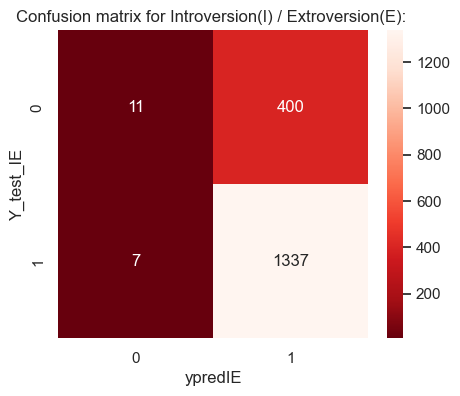

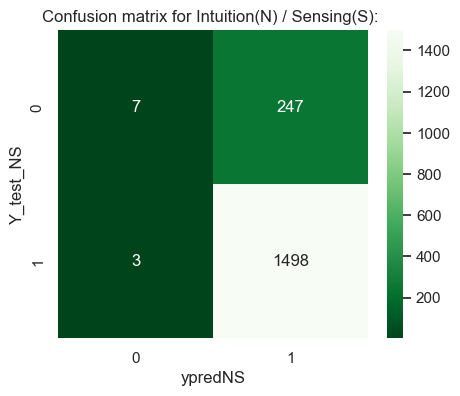

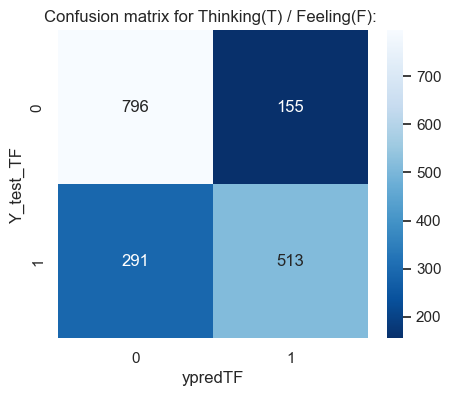

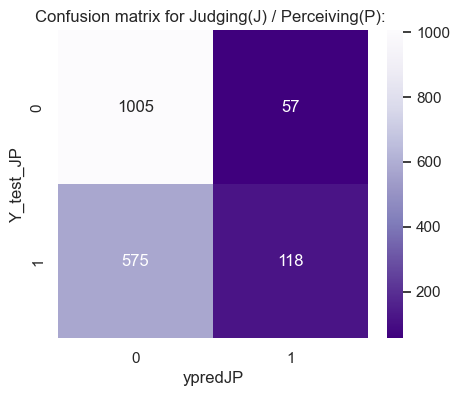

In [125]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

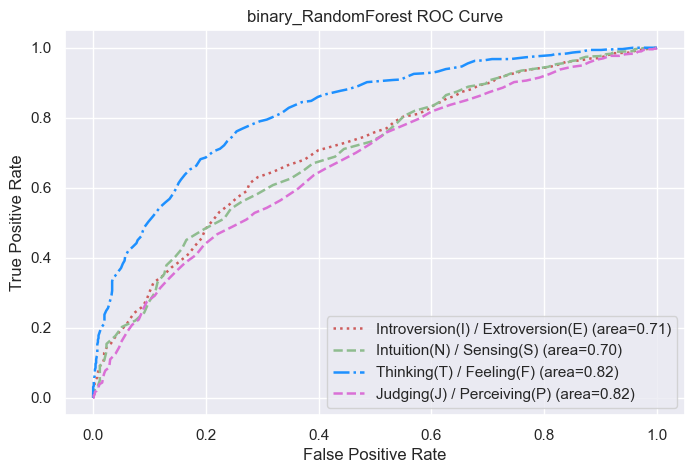

In [126]:
# ROC curve
print_roc_auc_curve(rf_IE.best_estimator_.predict_proba(X_test_IE),
                    rf_NS.best_estimator_.predict_proba(X_test_NS),
                    rf_TF.best_estimator_.predict_proba(X_test_TF),
                    rf_JP.best_estimator_.predict_proba(X_test_JP),
                    title='binary_RandomForest')

#### Gradient Boost

In [127]:
gb = GradientBoostingClassifier(random_state=42)
# Fit
gb_IE, gb_NS, gb_TF, gb_JP = fitCV(gb)
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predictCV(gb_IE,gb_NS,gb_TF,gb_JP)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.54      0.08      0.14       411
           1       0.78      0.98      0.87      1344

    accuracy                           0.77      1755
   macro avg       0.66      0.53      0.50      1755
weighted avg       0.72      0.77      0.70      1755


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.60      0.06      0.11       254
           1       0.86      0.99      0.92      1501

    accuracy                           0.86      1755
   macro avg       0.73      0.53      0.52      1755
weighted avg       0.82      0.86      0.80      1755


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       951
           1       0.75      0.69      0.72       804

    accuracy

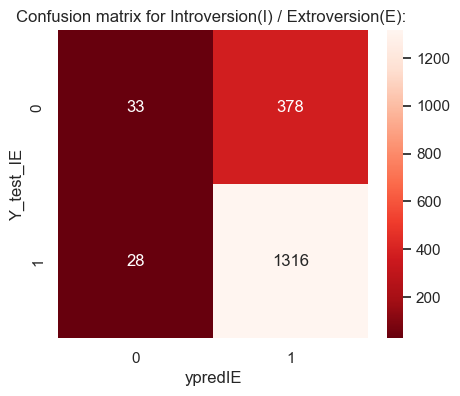

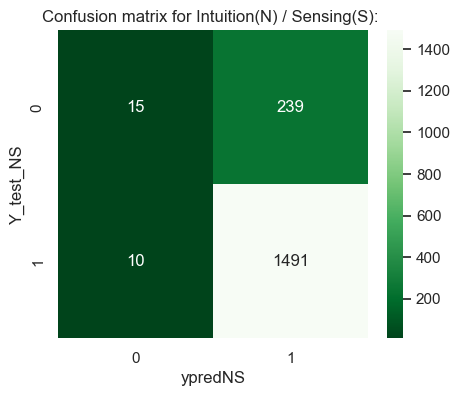

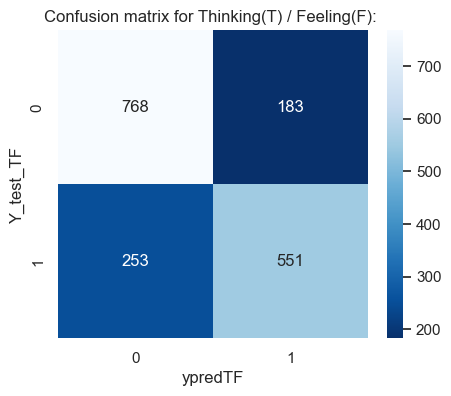

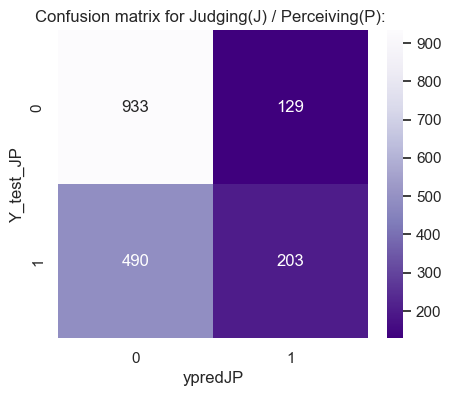

In [128]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

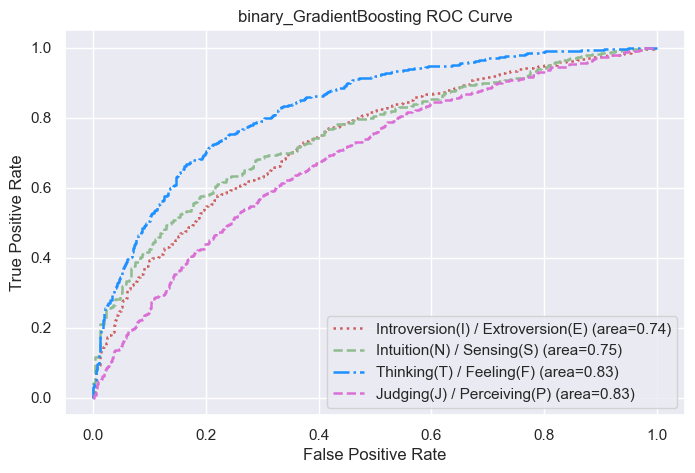

In [129]:
# ROC curve
print_roc_auc_curve(gb_IE.best_estimator_.predict_proba(X_test_IE),
                    gb_NS.best_estimator_.predict_proba(X_test_NS),
                    gb_TF.best_estimator_.predict_proba(X_test_TF),
                    gb_JP.best_estimator_.predict_proba(X_test_JP),
                    title='binary_GradientBoosting')

## Test on Celebrity dataset
利用名人 Twitter 資料集來預測陌生資料的 MBTI

### Preprocess

In [130]:
# # If you didn't install emoji before:
# !pip install emoji --upgrade
import emoji

In [131]:
def combineRow(data):
	tweet_data = []  
	tmp = data.copy()
	m = tmp['tweet'].str.contains('\w+')
	tmp_ = tmp[m].groupby((~m).cumsum(), as_index=False).agg(', '.join)
	tweet_data.append(tmp_)
	tweet_data = pd.concat(tweet_data)
	return tweet_data

def processEmoji(data):
	for i in range(len(data)):
		post = data.at[i, 'tweet']
		result = re.findall(r'\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[0-9][0-9]\\x[A-Za-z][0-9]\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[0-9][0-9]\\x[A-Za-z][0-9]|\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[0-9][A-Za-z]\\x[A-Za-z][0-9]|\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[0-9][0-9]\\x[A-Za-z][0-9]|\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[0-9][0-9]\\x[0-9][0-9]|\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]|\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[0-9][0-9]\\x[0-9][A-Za-z]|\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[0-9][0-9]\\x[A-Za-z][A-Za-z]|\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]\\x[A-Za-z][0-9]\\x[A-Za-z][0-9]|\\x[A-Za-z][0-9]\\x[0-9][0-9]\\x[0-9][0-9]|\\x[A-Za-z][0-9]\\x[0-9][0-9]\\x[A-Za-z][0-9]\\x[A-Za-z][A-Za-z]\\x[A-Za-z][0-9]\\x[0-9][A-Za-z]|\\x[A-Za-z][0-9]\\x[0-9][0-9]\\x[0-9][A-Za-z]', post)
		string_ = []
		for j in result:
			string_.append(j.encode().decode('unicode_escape').encode("raw_unicode_escape"))
			emoji_list = []
		for k in string_:
			emoji_list.append(k.decode("utf-8", errors='ignore'))
			emoji_text = []
		for m in range(len(emoji_list)):
			emoji_text.append(emoji.demojize(emoji_list[m]))
			post_list = []
		for l in range(len(result)):
			post = post.replace(result[l] , emoji_text[l])
			data.tweet[i] = post
	return data

def Preprocessor_test(text):
    # Cleaning
    text = re.sub(r'\|\|\|', ' ', text)  # Split by separator
    text = re.sub(r'http\S+', ' ', text)  # Replace hyperlink
    text = re.sub(r'\d',' ', text)  # 去除數字
    text = re.sub(r'^b\'', ' ', text) 
    text = re.sub(r"[A-Za-z]+\'+\w+", ' ', text)  # Handling apostrophe (e.g. you've, there's)
    text = re.sub(r'x[A-Za-z]', ' ', text)
    text = re.sub(r'\b[A-Za-z]\b', ' ', text)
    text = re.sub(r"\@+[A-Za-z]+\w+", ' ', text)
    text = re.sub(r'\bR[A-Z]\b', ' ', text)
    text = re.sub(r'[.,"\'\-?:!;@#&()]', ' ', text)
    text = re.sub(r'\\',' ', text)
    text = re.sub(r'[’“”/]', ' ', text)
    # text = re.sub('[^0-9a-zA-Z]',' ', text)  # Keep only numbers and alphabets (remove special characters)
    # text = re.sub(r'\b[A-Za-z]\b', ' ', text)
    text = text.lower()
    text = re.sub('intj|intp|entj|entp|infp|enfj|enfp|istj|isfj|estj|esfj|istp|isfp|estp|esfp|infj', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if not w in stopwords.words('english')]  # Remove stopwords
    # Stemming
    stemmer_ = SnowballStemmer("english")
    stemmed = [stemmer_.stem(t) for t in filtered_tokens]
    # Lemmatizing
    lemma = WordNetLemmatizer()
    lemmatized = " ".join([lemma.lemmatize(w) for w in stemmed])
    return lemmatized

def test_text(data):
	for i in range(len(data)):
		post = data.loc[i, 'tweet']

		text = Preprocessor_test(post)

		data.tweet[i] = text
	return data

預測會用到的 function

In [132]:
modelList = {'gNB': [gNB_IE, gNB_NS, gNB_TF, gNB_JP],
            'log': [log_IE, log_NS, log_TF, log_JP],
            'svm': [svm_IE, svm_NS, svm_TF, svm_JP],
            'knn': [knn_IE, knn_NS, knn_TF, knn_JP],
            'dt': [dt_IE, dt_NS, dt_TF, dt_JP],
            'rf': [rf_IE, rf_NS, rf_TF, rf_JP],
            'gb': [gb_IE, gb_NS, gb_TF, gb_JP]}

### Case 1 Adele: ENTJ

In [133]:
def predictMBTI(model:str , svd):
    pred_IE = modelList[str(model)][0].predict(svd)
    pred_NS = modelList[str(model)][1].predict(svd)
    pred_TF = modelList[str(model)][2].predict(svd)
    pred_JP = modelList[str(model)][3].predict(svd)
    
    char = []  # list for storing result
    char.append('I') if pred_IE else char.append('E')
    char.append('N') if pred_NS else char.append('S')
    char.append('T') if pred_TF else char.append('F')
    char.append('J') if pred_JP else char.append('P')

    return ''.join(char)

In [134]:
df_adele = pd.read_csv('../data/Adele.csv')
df_adele

,twitter_id,date,tweet
0,1543973875687596033,2022-07-04 15:03:52+00:00,b'Thank you to my band and my crew for two sea...
1,1543973499508752386,2022-07-04 15:02:22+00:00,b'Hyde Park Night 2! My heart is absolutely fu...
2,1543254652807954439,2022-07-02 15:25:56+00:00,"b'Thank you my loves, I can\xe2\x80\x99t wait ..."
3,1543254498247835648,2022-07-02 15:25:19+00:00,b'Hyde Park Night 1! What a crowd!! https://t....
4,1542530240060194816,2022-06-30 15:27:22+00:00,b'Who\xe2\x80\x99s ready for tomorrow!? https:...
...,...,...,...
360,29513802932,2010-11-02 22:54:44+00:00,b'RT @ColumbiaRecords: NEWS: Adele @OfficialAd...
361,29419669509,2010-11-02 00:05:24+00:00,"b""Head over to Adele's newly re-designed websi..."
362,29104016829,2010-10-29 16:37:36+00:00,b'Adele has a new blog up at http://www.adele....
363,27248872792,2010-10-13 14:58:33+00:00,b'Adele has a new blog up at her website. Chec...


In [135]:
adele_data = combineRow(df_adele)
adele_data = processEmoji(adele_data)
adele_data = test_text(adele_data)

In [136]:
adele_tfidf = vectorizer.transform(adele_data.tweet)
adele_svd = svd.transform(adele_tfidf)

In [137]:
predictMBTI('svm', adele_svd)

'ESFP'

In [138]:
# truth: ENTJ
for idx, (k,v) in enumerate(modelList.items()):
    print(f'Result from model {k}: {predictMBTI(k, adele_svd)}')

Result from model gNB: ESFP
Result from model log: ESFP
Result from model svm: ESFP
Result from model knn: ESFP
Result from model dt: INFJ
Result from model rf: ESFP
Result from model gb: ESFP


### Case 2 Anna Kendrick: ENTP

In [139]:
df_anna = pd.read_csv('../data/AnnaKendrick47.csv')
df_anna

,twitter_id,date,tweet
0,1538329814771408896,2022-06-19 01:16:23+00:00,b'@billyeichner @ecareyo Billy!! If you keep t...
1,1538263976689246208,2022-06-18 20:54:46+00:00,b'@billyeichner We can finally live our truth ...
2,1495591654828687363,2022-02-21 02:50:11+00:00,"b'@LouisPeitzman Sir, please do not come for o..."
3,1495470771736514563,2022-02-20 18:49:51+00:00,b'@joshgondelman That\xe2\x80\x99s only becaus...
4,1495167995911360512,2022-02-19 22:46:43+00:00,b'@trixiemattel @Barbie \xf0\x9f\x92\x95\xf0\x...
...,...,...,...
2463,2880005300,2009-07-27 23:47:51+00:00,b'3.To clarify: annakendrick47 is my FIRST & o...
2464,2879979190,2009-07-27 23:46:09+00:00,b'2.Was asked why I didn\xe2\x80\x99t just hav...
2465,2879943758,2009-07-27 23:43:50+00:00,b'1.Must give a big thanks to Rachelle Lefevre...
2466,2831350530,2009-07-25 03:10:40+00:00,b'Seeeeee....... (this is the only twitter I h...


In [140]:
anna_data = combineRow(df_anna)
anna_data = processEmoji(anna_data)
anna_data = test_text(anna_data)
anna_tfidf = vectorizer.transform(anna_data.tweet)
anna_svd = svd.transform(anna_tfidf)

In [141]:
# truth: ENTP
for idx, (k,v) in enumerate(modelList.items()):
    print(f'Result from model {k}: {predictMBTI(k, anna_svd)}')

Result from model gNB: ESFP
Result from model log: ENFP
Result from model svm: INFP
Result from model knn: ESFP
Result from model dt: INFP
Result from model rf: INFP
Result from model gb: ENFP
